Data Preprocessing Pipeline

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sys
print(sys.executable)


c:\Program Files\Python313\python.exe


In [3]:
from sklearn.impute import SimpleImputer

In [4]:
df = pd.read_csv(r"C:\Users\omkar joshi\DATA SCIENCE\Databases\Data1.csv")

df

,State,Age,Salary,Purchased
0,Mumbai,44.0,72000.0,No
1,Bangalore,27.0,48000.0,Yes
2,Hyderabad,30.0,54000.0,No
3,Bangalore,38.0,61000.0,No
4,Hyderabad,40.0,NaN,Yes
5,Mumbai,35.0,58000.0,Yes
6,Bangalore,NaN,52000.0,No
7,Mumbai,48.0,79000.0,Yes
8,Hyderabad,50.0,83000.0,No
9,Mumbai,37.0,67000.0,Yes


In [5]:

x = df.iloc[:,:-1].values
y = df.iloc[:,3].values

In [6]:
imputer = SimpleImputer()
imputer = imputer.fit(x[:,1:3]) # fit the algorithm to the data set
x[:,1:3] = imputer.transform(x[:,1:3]) # transform the data with proper info

In [7]:
print(imputer.statistics_)


[3.87777778e+01 6.37777778e+04]


In [8]:
filled_df = pd.DataFrame(x, columns=df.columns[:-1])
filled_df

,State,Age,Salary
0,Mumbai,44.0,72000.0
1,Bangalore,27.0,48000.0
2,Hyderabad,30.0,54000.0
3,Bangalore,38.0,61000.0
4,Hyderabad,40.0,63777.777778
5,Mumbai,35.0,58000.0
6,Bangalore,38.777778,52000.0
7,Mumbai,48.0,79000.0
8,Hyderabad,50.0,83000.0
9,Mumbai,37.0,67000.0


Label Encoder -  convert categorical data into numerical data

In [9]:
# how to encode categorical data nd create  dummy variable
from sklearn.preprocessing import LabelEncoder
labelencoder_x = LabelEncoder()
labelencoder_x.fit_transform(x[:,0])
x[:,0] = labelencoder_x.fit_transform(x[:,0])

In [10]:
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [11]:
filled_df = pd.DataFrame(x, columns=df.columns[:-1])
filled_df

,State,Age,Salary
0,2,44.0,72000.0
1,0,27.0,48000.0
2,1,30.0,54000.0
3,0,38.0,61000.0
4,1,40.0,63777.777778
5,2,35.0,58000.0
6,0,38.777778,52000.0
7,2,48.0,79000.0
8,1,50.0,83000.0
9,2,37.0,67000.0


In [12]:
#spliting the data in training and testing set
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 0)
#if you remove random_state then your model not behave as accurate / and it won't pick the constant records
#rdandom_state = required when we split the record every time it constant records

In [13]:
'''training phase - train the data - bias - bias score
testing phase - test the data - variance - variance score

x_train + y_train -- bias score
x_test + y_test -- variance score

due to overfitting and underfitting accuracy will goes down and 
we will get high error

Overfitting --> 

Underfitting -->

'''


'training phase - train the data - bias - bias score\ntesting phase - test the data - variance - variance score\n\nx_train + y_train -- bias score\nx_test + y_test -- variance score\n\ndue to overfitting and underfitting accuracy will goes down and \nwe will get high error\n\nOverfitting --> \n\nUnderfitting -->\n\n'

Regression Model (22nd Sept)

In [14]:
df1 = pd.read_csv(r"C:\Users\omkar joshi\DATA SCIENCE\Databases\Salary_Data.csv")
df1

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [15]:
x = df1.iloc[:, :-1]
y = df1.iloc[:, -1]


In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state = 0)

In [17]:
x_train, x_test,y_train,y_test

(    YearsExperience
 27              9.6
 11              4.0
 17              5.3
 22              7.9
 5               2.9
 16              5.1
 8               3.2
 14              4.5
 23              8.2
 20              6.8
 1               1.3
 29             10.5
 6               3.0
 4               2.2
 18              5.9
 19              6.0
 9               3.7
 7               3.2
 25              9.0
 3               2.0
 0               1.1
 21              7.1
 15              4.9
 12              4.0,
     YearsExperience
 2               1.5
 28             10.3
 13              4.1
 10              3.9
 26              9.5
 24              8.7,
 27    112635
 11     55794
 17     83088
 22    101302
 5      56642
 16     66029
 8      64445
 14     61111
 23    113812
 20     91738
 1      46205
 29    121872
 6      60150
 4      39891
 18     81363
 19     93940
 9      57189
 7      54445
 25    105582
 3      43525
 0      39343
 21     98273
 15     67938
 12 

In [18]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(24, 1)
(6, 1)
(24,)
(6,)


In [19]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [20]:
regressor

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [21]:
y_pred = regressor.predict(x_test)

In [22]:
y_pred

array([ 40748.96184072, 122699.62295594,  64961.65717022,  63099.14214487,
       115249.56285456, 107799.50275317])

In [23]:
camparison = pd.DataFrame({'Actual' : y_test, 'Predicted': y_pred})
camparison

,Actual,Predicted
2,37731,40748.961841
28,122391,122699.622956
13,57081,64961.657170
10,63218,63099.142145
26,116969,115249.562855
24,109431,107799.502753


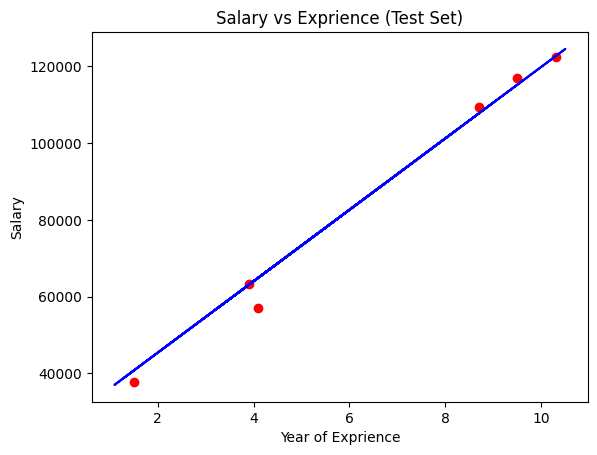

In [24]:
plt.scatter(x_test,y_test,color='red') #real salary data (testing)
plt.plot(x_train,regressor.predict(x_train), color='blue') # Regression Line
plt.title("Salary vs Exprience (Test Set)")
plt.xlabel('Year of Exprience')
plt.ylabel("Salary")
plt.show()
#It is best fit line

In [25]:
m = regressor.coef_
print(m)

[9312.57512673]


In [26]:
c = regressor.intercept_
print(c)

26780.09915062818


In [27]:
y_12 = m * 12 + c
print(y_12)

[138531.00067138]


In [28]:
y_20 = m * 20 + c
print(y_20)

[213031.60168521]


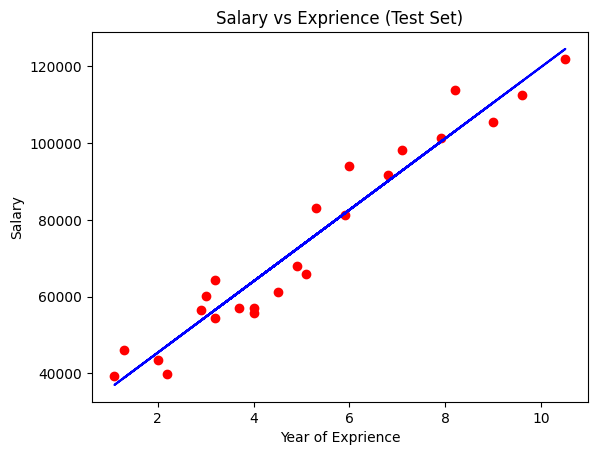

In [29]:
plt.scatter(x_train,y_train,color='red') #real salary data (testing)
plt.plot(x_train,regressor.predict(x_train), color='blue') # Regression Line
plt.title("Salary vs Exprience (Test Set)")
plt.xlabel('Year of Exprience')
plt.ylabel("Salary")
plt.show()

In [30]:
exp_12_future_pred = 9312 * 12 +26780
exp_12_future_pred

138524

In [31]:
bias = regressor.score(x_train,y_train)
bias

0.9411949620562126

In [32]:
variance = regressor.score(x_test,y_test)
variance

0.988169515729126

In [33]:
df1.mean()

YearsExperience        5.313333
Salary             76003.000000
dtype: float64

In [34]:
'''bias -- 94% variance and 30% --high bias low variance -->underfitting
bias -- 30% variance and 94% low bias high variance --> overfitting'''

'bias -- 94% variance and 30% --high bias low variance -->underfitting\nbias -- 30% variance and 94% low bias high variance --> overfitting'

Mean

In [35]:
df1['Salary'].mean()

np.float64(76003.0)

Median

In [36]:
df1.median()

YearsExperience        4.7
Salary             65237.0
dtype: float64

In [37]:
print(df1['Salary'].median())

65237.0


Mode

In [38]:
df1['Salary'].mode()

0      37731
1      39343
2      39891
3      43525
4      46205
5      54445
6      55794
7      56642
8      56957
9      57081
10     57189
11     60150
12     61111
13     63218
14     64445
15     66029
16     67938
17     81363
18     83088
19     91738
20     93940
21     98273
22    101302
23    105582
24    109431
25    112635
26    113812
27    116969
28    121872
29    122391
Name: Salary, dtype: int64

variance

In [39]:
df1.var()

YearsExperience    8.053609e+00
Salary             7.515510e+08
dtype: float64

In [40]:
print(df1['Salary'].var())

751550960.4137931


In [41]:
from sklearn.metrics import mean_squared_error
train_mse = mean_squared_error(y_train, regressor.predict(x_train))
test_mse = mean_squared_error(y_test, y_pred)
print(train_mse)
print(test_mse)

36149670.11816131
12823412.298126549


Standard Deviation

In [42]:
df1.std()

YearsExperience        2.837888
Salary             27414.429785
dtype: float64

In [43]:
print(df1['Salary'].std())

27414.4297845823


Coefficient of variation

In [44]:
from scipy.stats import variation
variation(df1.values)

array([0.5251297 , 0.35463929])

In [45]:
print(variation(df1['Salary']))

0.3546392938275572


Correlation

In [46]:
df1.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [47]:
print(df1['Salary'].corr(df1['YearsExperience']))

0.9782416184887598


Skewness

In [48]:
df1.skew()

YearsExperience    0.37956
Salary             0.35412
dtype: float64

In [49]:
print(df1['Salary'].skew())

0.35411967922959153


Standaed Error

In [50]:
df1.sem()

YearsExperience       0.518125
Salary             5005.167198
dtype: float64

In [51]:
print(df1['Salary'].sem())

5005.167198052405


In [52]:
import scipy.stats as stats
df1.apply(stats.zscore)

,YearsExperience,Salary
0,-1.510053,-1.360113
1,-1.438373,-1.105527
2,-1.366693,-1.419919
3,-1.187494,-1.204957
4,-1.115814,-1.339781
5,-0.864935,-0.718307
6,-0.829096,-0.588158
7,-0.757416,-0.799817
8,-0.757416,-0.428810
9,-0.578216,-0.698013


In [53]:
stats.zscore(df1['Salary'])

array([-1.36011263, -1.10552744, -1.419919  , -1.20495739, -1.33978143,
       -0.71830716, -0.58815781, -0.79981746, -0.42881019, -0.69801306,
       -0.47433279, -0.74976858, -0.70662043, -0.70201994, -0.55250402,
       -0.29921736, -0.37004264,  0.26285865,  0.19885989,  0.66547573,
        0.58377993,  0.82623317,  0.93861127,  1.40274136,  1.24020308,
        1.09740238,  1.51986835,  1.3590738 ,  1.72102849,  1.70177321])

Sum of square Regressor

In [54]:
y_mean = np.mean(y)
SSR = np.sum(y_pred - y_mean)
print(SSR)


58540.449719478245


In [55]:
#SSE
y = y[0:6]
SSE = np.sum((y - y_pred)**2)
print(SSE)

15274062883.943203


In [56]:
#SST
mean_total = np.mean(df1.values)
SST = np.sum((df1.values - mean_total)**2)
print(SST)

108429703765.82735


R2 Square

In [57]:
r_square = 1 - (SSR/SST)
print(r_square)

0.9999994601068924


In [58]:
import pickle #-> all 109 code line will zip into one object and create frontend
filename = 'linear_regression_model.pkl'
with open(filename,'wb') as file:
    pickle.dump(regressor, file)
print("Model has been pickled and saved as linear_regression_model.pkl")


Model has been pickled and saved as linear_regression_model.pkl


In [59]:
import os
print(os.getcwd())

c:\Users\omkar joshi\DATA SCIENCE


Multiple Linear Regression

In [60]:
df2 = pd.read_csv(r"C:\Users\omkar joshi\DATA SCIENCE\Databases\Investment.csv")
df2

,DigitalMarketing,Promotion,Research,State,Profit
0,165349.20,136897.80,471784.10,Hyderabad,192261.83
1,162597.70,151377.59,443898.53,Bangalore,191792.06
2,153441.51,101145.55,407934.54,Chennai,191050.39
3,144372.41,118671.85,383199.62,Hyderabad,182901.99
4,142107.34,91391.77,366168.42,Chennai,166187.94
5,131876.90,99814.71,362861.36,Hyderabad,156991.12
6,134615.46,147198.87,127716.82,Bangalore,156122.51
7,130298.13,145530.06,323876.68,Chennai,155752.60
8,120542.52,148718.95,311613.29,Hyderabad,152211.77
9,123334.88,108679.17,304981.62,Bangalore,149759.96


In [61]:
x = df2.iloc[:,:-1]
y = df2.iloc[:,4]

In [62]:
x = pd.get_dummies(x,dtype=int)

In [63]:
x

,DigitalMarketing,Promotion,Research,State_Bangalore,State_Chennai,State_Hyderabad
0,165349.20,136897.80,471784.10,0,0,1
1,162597.70,151377.59,443898.53,1,0,0
2,153441.51,101145.55,407934.54,0,1,0
3,144372.41,118671.85,383199.62,0,0,1
4,142107.34,91391.77,366168.42,0,1,0
5,131876.90,99814.71,362861.36,0,0,1
6,134615.46,147198.87,127716.82,1,0,0
7,130298.13,145530.06,323876.68,0,1,0
8,120542.52,148718.95,311613.29,0,0,1
9,123334.88,108679.17,304981.62,1,0,0


In [64]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state = 0)

In [65]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [66]:
y_pred = regressor.predict(x_test)
 

In [67]:
y_pred

array([103015.20159796, 132582.27760816, 132447.73845174,  71976.09851258,
       178537.48221055, 116161.24230165,  67851.69209676,  98791.73374687,
       113969.43533012, 167921.0656955 ])

In [68]:
m = regressor.coef_
m

array([ 7.73467193e-01,  3.28845975e-02,  3.66100259e-02,  8.66383692e+01,
       -8.72645791e+02,  7.86007422e+02])

In [69]:
c = regressor.intercept_
print(c)

42467.52924855317


In [70]:
x = np.append(arr = np.full((50,1),42467).astype(int), values = x, axis=1)

In [ ]:
print(x)

#remove attribute == feature alimination or feature selection technique

#feature engineering = eda technique
#feature selection = RFE(recursive featute elimination)
#feature scaling == normalization and standardization


[[4.2467000e+04 1.6534920e+05 1.3689780e+05 4.7178410e+05 0.0000000e+00
  0.0000000e+00 1.0000000e+00]
 [4.2467000e+04 1.6259770e+05 1.5137759e+05 4.4389853e+05 1.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [4.2467000e+04 1.5344151e+05 1.0114555e+05 4.0793454e+05 0.0000000e+00
  1.0000000e+00 0.0000000e+00]
 [4.2467000e+04 1.4437241e+05 1.1867185e+05 3.8319962e+05 0.0000000e+00
  0.0000000e+00 1.0000000e+00]
 [4.2467000e+04 1.4210734e+05 9.1391770e+04 3.6616842e+05 0.0000000e+00
  1.0000000e+00 0.0000000e+00]
 [4.2467000e+04 1.3187690e+05 9.9814710e+04 3.6286136e+05 0.0000000e+00
  0.0000000e+00 1.0000000e+00]
 [4.2467000e+04 1.3461546e+05 1.4719887e+05 1.2771682e+05 1.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [4.2467000e+04 1.3029813e+05 1.4553006e+05 3.2387668e+05 0.0000000e+00
  1.0000000e+00 0.0000000e+00]
 [4.2467000e+04 1.2054252e+05 1.4871895e+05 3.1161329e+05 0.0000000e+00
  0.0000000e+00 1.0000000e+00]
 [4.2467000e+04 1.2333488e+05 1.0867917e+05 3.0498162e+05 1.0000000e+00
 

In [ ]:
import statsmodels.api as sm
#API = agent (which connect stats to ml and vice versa)
#Least error = minimum error

In [78]:
x_opt = x[:,[0,1,2,3,4,5]]
#ordinary least squares
regressor_osl = sm.OLS(endog=y, exog=x_opt).fit()
regressor_osl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Wed, 24 Sep 2025   Prob (F-statistic):           1.34e-27
Time:                        19:59:24   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1794      0.164      7.204      0.000       0.849       1.509
x1             0.8060      0.046     17.369      0.000       0.712       0.900
x2            -0.0270      0.052     -0.517      0.608      -0.132       0.078
x3             0.0270      0.017      1.574      0.123      -0.008       0.062
x4            41.8870   3256.039      0.013      0.990   -6520.229    6604.003
x5           240.6758   3338.857      0.072      0.943   -6488.349    6969.701
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     8.45e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.45e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [74]:
x_opt = x[:,[0,1,2,3,5]]
#ordinary least squares
regressor_osl = sm.OLS(endog=y, exog=x_opt).fit()
regressor_osl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Wed, 24 Sep 2025   Prob (F-statistic):           8.49e-29
Time:                        19:57:43   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1799      0.157      7.537      0.000       0.865       1.495
x1             0.8060      0.046     17.606      0.000       0.714       0.898
x2            -0.0270      0.052     -0.523      0.604      -0.131       0.077
x3             0.0270      0.017      1.592      0.118      -0.007       0.061
x4           220.1585   2900.536      0.076      0.940   -5621.821    6062.138
==============================================================================
Omnibus:                       14.758   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.172
Skew:                          -0.948   Prob(JB):                     2.53e-05
Kurtosis:                       5.563   Cond. No.                     6.18e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.18e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [75]:
x_opt = x[:,[0,1,2,3]]
#ordinary least squares
regressor_osl = sm.OLS(endog=y, exog=x_opt).fit()
regressor_osl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Wed, 24 Sep 2025   Prob (F-statistic):           4.53e-30
Time:                        19:57:58   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1803      0.155      7.626      0.000       0.869       1.492
x1             0.8057      0.045     17.846      0.000       0.715       0.897
x2            -0.0268      0.051     -0.526      0.602      -0.130       0.076
x3             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                         35.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
x_opt = x[:,[0,1]]
#ordinary least squares
regressor_osl = sm.OLS(endog=y, exog=x_opt).fit()
regressor_osl.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Wed, 24 Sep 2025   Prob (F-statistic):           3.50e-32
Time:                        19:58:09   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1546      0.060     19.320      0.000       1.034       1.275
x1             0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                         4.60
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
bias = regressor.score(x_train,y_train)
bias

0.9501847627493607

In [79]:
variance = regressor.score(x_test,y_test)
variance

0.9347068473282424